### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import prince
from sklearn.metrics import confusion_matrix

### Read in the data

In [2]:
df = pd.read_csv('diabetic_data.csv')

### Fix various issues with the variables

In [3]:
#Replace "?" values with nan since these are missing values
df.replace('?',np.nan,inplace=True)
#Drop rows where we don't have race since it's a relatively small amount
df.dropna(inplace=True,subset = ['race'])
#Relevel the readmitted variable so that it becomes a binary question of readmitted or not
readmitted_dict = {'NO':0, '<30':1,'>30':1}
df['readmitted'] = df['readmitted'].map(readmitted_dict)
#Remove all rows where gender is unknown since there's so few
df = df[df['gender']!='Unknown/Invalid']
#Relevel the race variable to condense the uncommon levels into the "Other" level
race_dict = {'Caucasian':'Caucasian','AfricanAmerican':'AfricanAmerican','Hispanic':'Other','Other':'Other','Asian':'Other'}
df['race'] = df['race'].map(race_dict)
#Get dummy variables for gender and race
df = pd.get_dummies(df,columns=['gender','race'],drop_first=True)
#relevel the columns from metformin to metformin-pioglitazone to be 0 if they are not on the drug and 1 if they are
for col in df.loc[:,'metformin':'metformin-pioglitazone']:
    df[col] = df[col].map({'No':'No','Steady':'Yes','Up':'Yes','Down':'Yes'})

### Examine correlations between the variables

Text(0.5, 1.0, 'Correlation Heatmap')

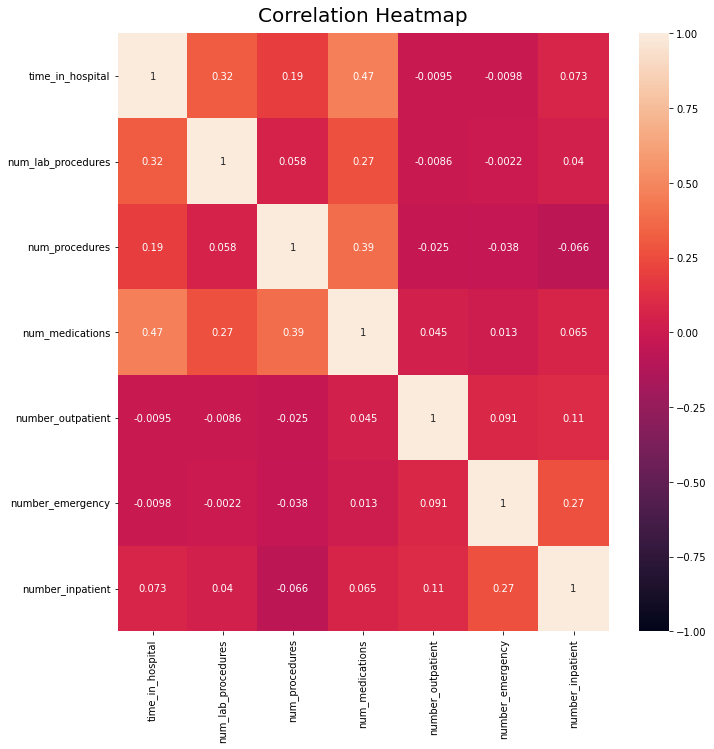

In [4]:
#Get only quantitative columns to compute correlations of
df_quant = df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']]
#Compute correlations between these quantitative variables and output a heatmap
corr = df_quant.corr()
plt.figure(figsize=(11, 11))
heatmap = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

### Trying out PCA

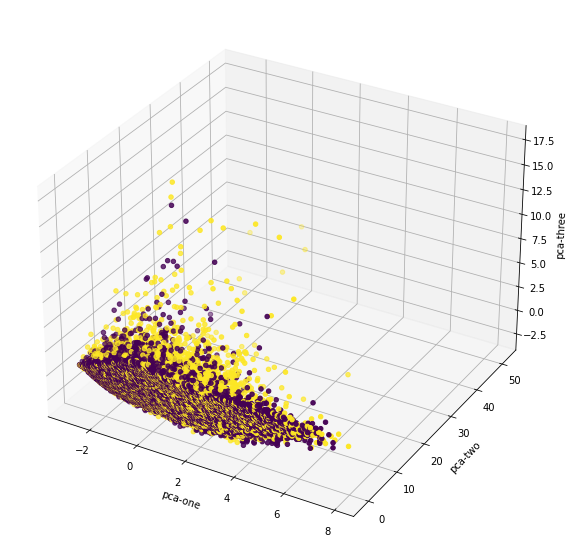

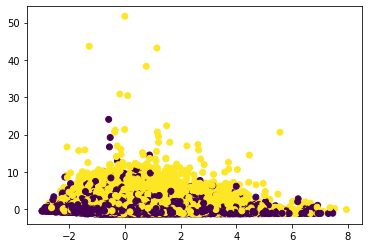

In [5]:
#Getting the quantitative variables
x = df.loc[:, df_quant.columns].values
#Getting the response variable
y = df.loc[:,['readmitted']].values
#Standardizing the quantitative variables
pca_x = StandardScaler().fit_transform(x)
#Establishing the number of principle components to create and actually creating them
pca = PCA(n_components=4)
pr_comp = pca.fit_transform(pca_x)
#Store results in a data frame and add the response variable
df_pca = pd.DataFrame(pr_comp ,columns = ['PC1', 'PC2','PC3','PC4'])
df_pca['readmitted'] = df['readmitted'].values
#Plot the principal components and color by the readmitted variable to see how well the principal components
#separate the classes
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
ax.scatter(
    xs=df_pca['PC1'], 
    ys=df_pca['PC2'], 
    zs=df_pca['PC3'], 
    c=df_pca['readmitted']
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=df_pca['readmitted'])
#make scree plot to see how much variance is explained by each principal component
# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.show()

In [8]:
#random forest model predicting readmitted with t-sne1 and t-sne2
X = df_pca[['PC1','PC2']]
y = df_pca['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[6513, 4095],
       [4644, 4647]], dtype=int64)

In [11]:
df['readmitted'].value_counts()

0    53316
1    46176
Name: readmitted, dtype: int64

<AxesSubplot:xlabel='readmitted', ylabel='PC1'>

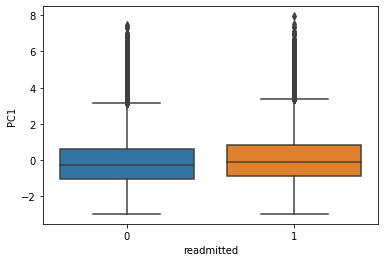

In [10]:
sns.boxplot(x=df_pca['readmitted'],y=df_pca['PC1'])

### Trying out t-SNE

In [23]:
tsne_x = StandardScaler().fit_transform(x)
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(tsne_x)

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 99492 samples in 0.235s...
[t-SNE] Computed neighbors for 99492 samples in 32.460s...
[t-SNE] Computed conditional probabilities for sample 1000 / 99492
[t-SNE] Computed conditional probabilities for sample 2000 / 99492
[t-SNE] Computed conditional probabilities for sample 3000 / 99492
[t-SNE] Computed conditional probabilities for sample 4000 / 99492
[t-SNE] Computed conditional probabilities for sample 5000 / 99492
[t-SNE] Computed conditional probabilities for sample 6000 / 99492
[t-SNE] Computed conditional probabilities for sample 7000 / 99492
[t-SNE] Computed conditional probabilities for sample 8000 / 99492
[t-SNE] Computed conditional probabilities for sample 9000 / 99492
[t-SNE] Computed conditional probabilities for sample 10000 / 99492
[t-SNE] Computed conditional probabilities for sample 11000 / 99492
[t-SNE] Computed conditional probabilities for sample 12000 / 99492
[t-SNE] Computed conditional probabilities for sa

<ipython-input-24-1dbeb029a409>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

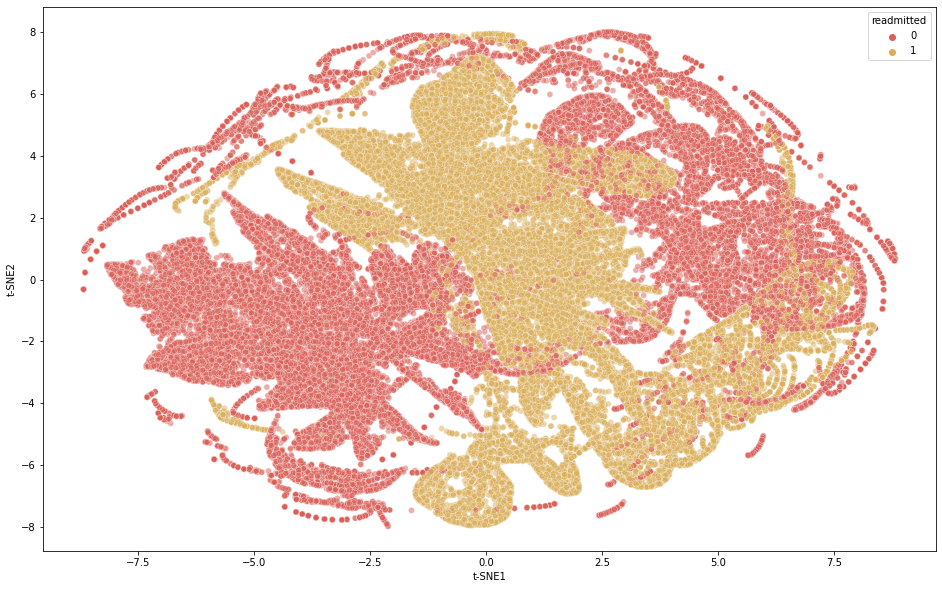

In [24]:
df_tsne = pd.DataFrame(df['readmitted'])
df_tsne['t-SNE1'] = tsne_results[:,0]
df_tsne['t-SNE2'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='t-SNE1', y='t-SNE2',
    hue="readmitted",
    palette=sns.color_palette('hls', 10),
    data=df_tsne,
    legend='full',
    alpha=0.5
)

In [25]:
#random forest model predicting readmitted with t-sne1 and t-sne2
X = df_tsne[['t-SNE1','t-SNE2']]
y = df_tsne['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[10390,   218],
       [  165,  9126]], dtype=int64)

### Trying out LDA

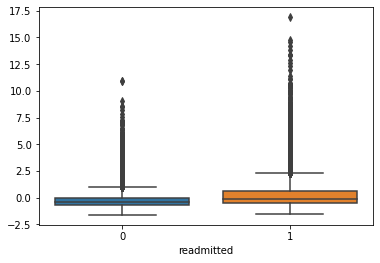

In [9]:
#Set up LDA model
lda = LinearDiscriminantAnalysis()
lda_x = final_df_pca[['PC1','PC2','PC3','PC4']]
#Fit the model to the quantitative variables with the readmitted variable being the class to try to separate on
lda.fit(df_quant,df['readmitted'])
#Apply the model to the quantitative variables
transformed = lda.transform(df_quant)
#Make a boxplot of the transformed data faceted by the readmitted variable
sns.boxplot(x=df['readmitted'],y=transformed[:,0],data=df)
#combine the transformed data with the readmitted variable and plot it
df_lda = pd.DataFrame(transformed,columns=['LDA1'])
df_lda['readmitted'] = df['readmitted']

In [10]:
#find correlation between the LDA1 variable and the readmitted variable
df_lda.corr()

,LDA1,readmitted
LDA1,1.000000,0.004887
readmitted,0.004887,1.000000


### Trying clustering

In [11]:
#do kmeans clustering on df_quant
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_quant)
#add the cluster labels to the data frame
df['cluster'] = kmeans.labels_
print(pd.crosstab(df['cluster'],df['readmitted']))
df = pd.get_dummies(columns=['cluster'],data=df,drop_first=True)

readmitted      0      1
cluster                 
0           25538  21944
1           16381  15713
2           11397   8519


### Trying MCA - Quantitative Columns

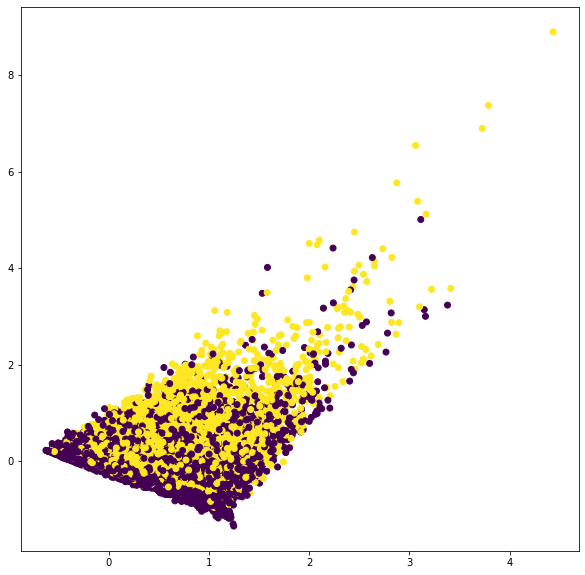

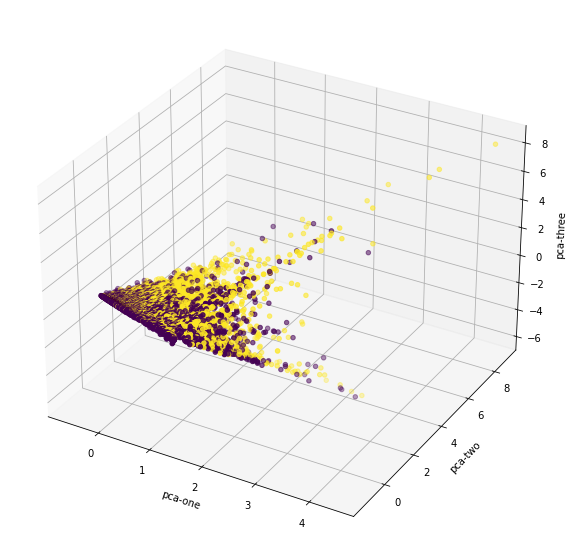

In [12]:
mca = prince.MCA(n_components = 4)
mca = mca.fit(df_quant)
mca = mca.transform(df_quant)
#rename the columns
mca.columns = ['MCA1','MCA2','MCA3','MCA4']
mca['readmitted'] = df['readmitted']
#plot the first two components of the MCA colored by the readmitted variable
ax = plt.figure(figsize=(10, 10))
plt.scatter(mca['MCA1'],mca['MCA2'],c=df['readmitted'])

ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
ax.scatter(
    xs=mca['MCA1'], 
    ys=mca['MCA2'], 
    zs=mca['MCA3'], 
    c=mca['readmitted']
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### MCA - Drugs Columns

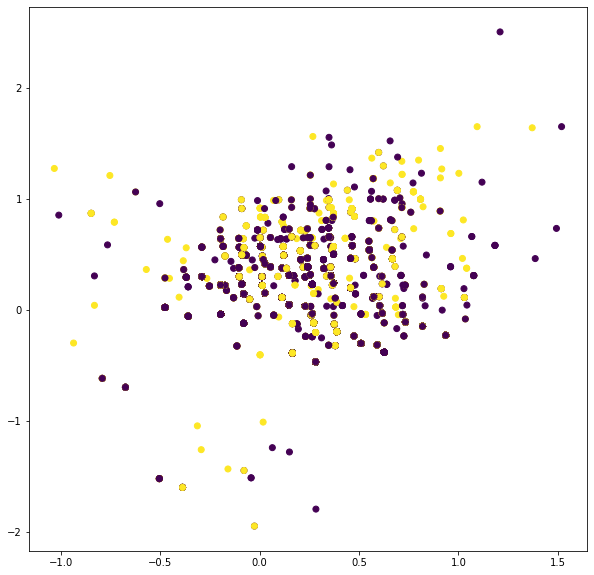

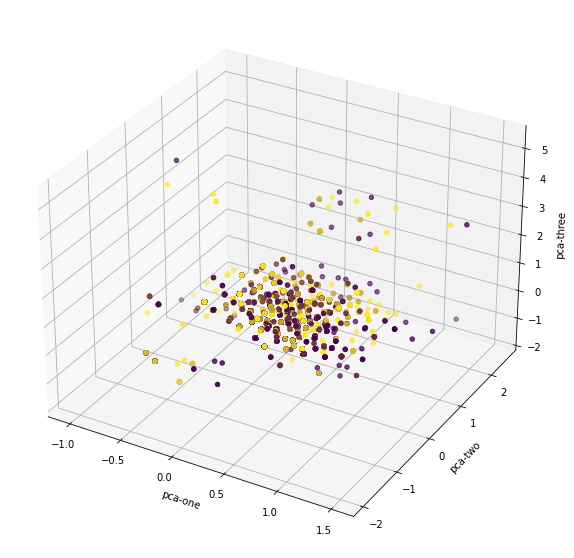

In [13]:
#get dummies for all columns from metformin to metformin-pioglitazone and save as df_dummies
df_drugs = df.loc[:,'metformin':'metformin-pioglitazone']
mca = prince.MCA(n_components = 4)
mca = mca.fit(df_drugs)
mca = mca.transform(df_drugs)
#rename the columns
mca.columns = ['MCA1','MCA2','MCA3','MCA4']
mca['readmitted'] = df['readmitted']
#plot the first two components of the MCA colored by the readmitted variable
ax = plt.figure(figsize=(10, 10))
plt.scatter(mca['MCA1'],mca['MCA2'],c=df['readmitted'])
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
ax.scatter(
    xs=mca['MCA1'], 
    ys=mca['MCA2'], 
    zs=mca['MCA3'], 
    c=mca['readmitted']
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
df['MCA1'] = mca['MCA1']
df['MCA2'] = mca['MCA2']
df['MCA3'] = mca['MCA3']

In [15]:
#for each column in df_drugs, turn "no" to 0 and "yes" to 1
for col in df_drugs.columns:
    df_drugs[col] = df_drugs[col].replace('No',0)
    df_drugs[col] = df_drugs[col].replace('Yes',1)

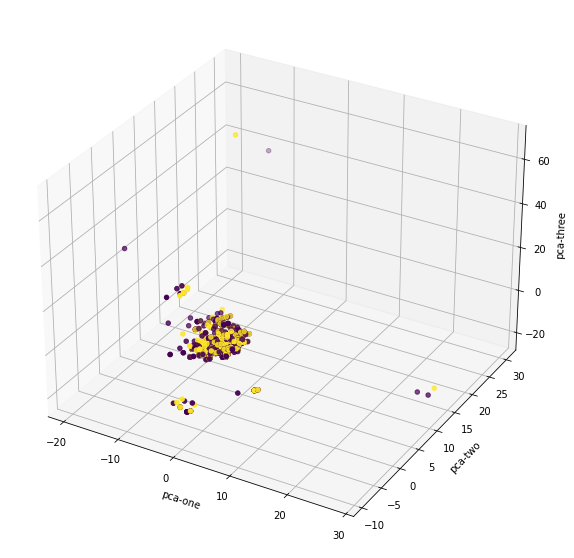

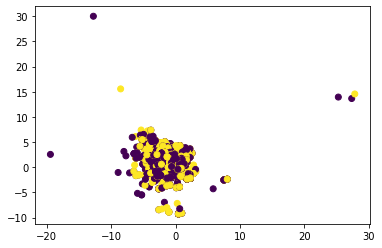

In [16]:

#Standardizing the quantitative variables
pca_x = StandardScaler().fit_transform(df_drugs)
#Establishing the number of principle components to create and actually creating them
pca = PCA(n_components=4)
pr_comp = pca.fit_transform(pca_x)
#Store results in a data frame and add the response variable
df_pca = pd.DataFrame(pr_comp ,columns = ['PC1', 'PC2','PC3','PC4'])
final_df_pca = pd.concat([df_pca, df[['readmitted']]], axis = 1)
#Plot the principal components and color by the readmitted variable to see how well the principal components
#separate the classes
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
ax.scatter(
    xs=final_df_pca['PC1'], 
    ys=final_df_pca['PC2'], 
    zs=final_df_pca['PC3'], 
    c=final_df_pca['readmitted']
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
plt.scatter(final_df_pca['PC1'],final_df_pca['PC2'],c=final_df_pca['readmitted'])
#make scree plot to see how much variance is explained by each principal component
# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.show()

In [34]:
#get correlation between the MCA1 variable and the readmitted variable
mca.corr()

,MCA1,MCA2,MCA3,MCA4,readmitted
MCA1,1.000000,-0.000030,-0.000040,0.000064,-0.022667
MCA2,-0.000030,1.000000,-0.000058,-0.000074,0.030353
MCA3,-0.000040,-0.000058,1.000000,-0.000018,0.007929
MCA4,0.000064,-0.000074,-0.000018,1.000000,-0.001615
readmitted,-0.022667,0.030353,0.007929,-0.001615,1.000000


In [5]:
# df_weight_valid = df[df['weight'].notnull()&df['race'].notnull()]
# df_weight_valid = pd.get_dummies(df_weight_valid,columns=['race','gender'])
# weight_dict = {'[0-25)':0,'[25-50)':0, '[50-75)':0,'[75-100)':0,'[100-125)':1,'[125-150)':1,'[150-175)':1,'[175-200)':1,'>200':1,np.nan:np.nan}
# df_weight_valid['weight'] = df_weight_valid['weight'].map(weight_dict)
# df_weight_valid.iloc[:,-6:]
# X = df_weight_valid.iloc[:,-6:]
# y = df_weight_valid['weight']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

In [6]:
# #Set up a dictionary to store the accuracy for different values of k
# knn_results = []
# #Loop through a variety of values for k number of neighbors
# for k in range(1,20):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
#     knn_results.append(scores.mean())
# #Plot the results
# plt.plot(range(1,20), knn_results)
# plt.xlabel('Value of k')
# plt.ylabel('Cross-Validation Accuracy')
# plt.title('Cross-Validation Accuracy vs. k')
# plt.show()

In [7]:
# knn_final = KNeighborsClassifier(n_neighbors = 4)
# knn_final.fit(X_train,y_train)
# knn_final_pred = knn_final.predict(X_test)
# knn_final.score(X_test,y_test)

In [8]:
# n_estimators = [100,150,200,250,300] 
# max_depth = [2,3,4,5,6] 
# grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
# rf_mod_tuned = RandomForestClassifier(random_state=1)
# #Since we're doing cross validation, combine the training and validation data
# rf_mod_tuned = GridSearchCV(estimator = rf_mod_tuned, param_grid = grid,
#                cv = 5, verbose=2, n_jobs = -1)
# rf_mod_tuned_fitted = rf_mod_tuned.fit(X_train,y_train)
# rf_mod_tuned_pred = rf_mod_tuned_fitted.predict(X_test)
# rf_mod_tuned_fitted.score(X_test,y_test)

In [9]:
# df = pd.get_dummies(df,columns=['race','gender'])
# df['weight'] = df['weight'].map(weight_dict)
# df_test = df[df['weight'].isna()]
# df_train = df.dropna()
# # X_train = df_train[:,-6:]
# # y_train = df_train['weight']
# # X_test = df_test[:-6:]
# # df_weight_valid.iloc[:,-6:]
# # X = df_weight_valid.iloc[:,-6:]
# # y = df_weight_valid['weight']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

In [5]:
X = df[['gender_Male','race_Caucasian','race_Other']]
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
train_all = pd.concat([X_train, y_train], axis=1)
m1 = smf.logit(
  formula='readmitted~gender_Male+race_Caucasian+race_Other',
  data=train_all) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.690019
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                79593
Model:                          Logit   Df Residuals:                    79589
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:               0.0008531
Time:                        15:35:35   Log-Likelihood:                -54921.
converged:                       True   LL-Null:                       -54968.
Covariance Type:            nonrobust   LLR p-value:                 3.369e-20
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1364      0.017     -7.956      0.000      -0.170      -0.103
gender_Male       -0.0803      0.014     -5.616      0.000      -0.108      -0.052
race_Caucasian     0.0522      0.018      2.874      0.004       0.017       0.088
race_Other        -0.2228      0.039     -5.757      0.000      -0.299      -0.147
==================================================================================
"""

In [133]:
m2 = smf.logit(
  formula='readmitted~PC1+PC2+PC3+PC4',
  data=final_df_pca) \
.fit()

m2.summary()

Optimization terminated successfully.
         Current function value: 0.690856
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                97287
Model:                          Logit   Df Residuals:                    97282
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:               1.849e-05
Time:                        12:16:49   Log-Likelihood:                -67211.
converged:                       True   LL-Null:                       -67213.
Covariance Type:            nonrobust   LLR p-value:                    0.6472
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1352      0.006    -21.031      0.000      -0.148      -0.123
PC1           -0.0016      0.005     -0.336      0.737      -0.011       0.008
PC2            0.0077      0.006      1.386      0.166      -0.003       0.019
PC3            0.0019      0.006      0.291      0.771      -0.011       0.015
PC4            0.0040      0.007      0.604      0.546      -0.009       0.017
==============================================================================
"""

In [21]:
m3 = smf.logit(
  formula='readmitted~LDA1',
  data=df_lda) \
.fit()

m3.summary()

Optimization terminated successfully.
         Current function value: 0.690857
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                97287
Model:                          Logit   Df Residuals:                    97285
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:               1.727e-05
Time:                        15:45:00   Log-Likelihood:                -67211.
converged:                       True   LL-Null:                       -67213.
Covariance Type:            nonrobust   LLR p-value:                    0.1276
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1352      0.006    -21.032      0.000      -0.148      -0.123
LDA1           0.0095      0.006      1.524      0.127      -0.003       0.022
==============================================================================
"""

In [173]:
m3 = smf.logit(
  formula='readmitted~time_in_hospital+num_lab_procedures+num_procedures+num_medications+number_outpatient+number_emergency+number_inpatient',
  data=df) \
.fit()

m3.summary()

Optimization terminated successfully.
         Current function value: 0.658512
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                99492
Model:                          Logit   Df Residuals:                    99484
Method:                           MLE   Df Model:                            7
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                 0.04642
Time:                        12:50:38   Log-Likelihood:                -65517.
converged:                       True   LL-Null:                       -68706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6553      0.019    -34.844      0.000      -0.692      -0.618
time_in_hospital       0.0179      0.003      7.020      0.000       0.013       0.023
num_lab_procedures     0.0019      0.000      5.263      0.000       0.001       0.003
num_procedures        -0.0529      0.004    -12.498      0.000      -0.061      -0.045
num_medications        0.0076      0.001      7.724      0.000       0.006       0.010
number_outpatient      0.0935      0.006     15.449      0.000       0.082       0.105
number_emergency       0.2289      0.012     18.505      0.000       0.205       0.253
number_inpatient       0.3794      0.007     54.448      0.000       0.366       0.393
======================================================================================
"""

In [168]:
m4 = smf.logit(
  formula='readmitted~cluster_1+cluster_2',
  data=df) \
.fit()

m4.summary()

Optimization terminated successfully.
         Current function value: 0.689636
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                99492
Model:                          Logit   Df Residuals:                    99489
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                0.001353
Time:                        12:48:41   Log-Likelihood:                -68613.
converged:                       True   LL-Null:                       -68706.
Covariance Type:            nonrobust   LLR p-value:                 4.294e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1506      0.009    -16.337      0.000      -0.169      -0.133
cluster_1      0.1063      0.014      7.356      0.000       0.078       0.135
cluster_2     -0.1400      0.017     -8.215      0.000      -0.173      -0.107
==============================================================================
"""

In [240]:
m5 = smf.logit(
  formula='readmitted~MCA1+MCA2+MCA3+MCA4',
  data=mca) \
.fit()

m5.summary()

Optimization terminated successfully.
         Current function value: 0.689854
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                99492
Model:                          Logit   Df Residuals:                    99487
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                0.001037
Time:                        13:39:59   Log-Likelihood:                -68635.
converged:                       True   LL-Null:                       -68706.
Covariance Type:            nonrobust   LLR p-value:                 8.505e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1440      0.006    -22.637      0.000      -0.156      -0.132
MCA1          -0.1974      0.028     -7.128      0.000      -0.252      -0.143
MCA2           0.2592      0.029      8.956      0.000       0.202       0.316
MCA3           0.0873      0.029      2.994      0.003       0.030       0.145
MCA4          -0.0462      0.030     -1.567      0.117      -0.104       0.012
==============================================================================
"""

In [241]:
m6 = smf.logit(
  formula='readmitted~metformin+repaglinide+nateglinide+chlorpropamide+glimepiride+acetohexamide+glipizide+glyburide+tolbutamide+pioglitazone+rosiglitazone+acarbose+miglitol+troglitazone+tolazamide+examide+citoglipton+insulin+glyburide-metformin+glipizide-metformin+glimepiride-pioglitazone+metformin-rosiglitazone+metformin-pioglitazone',
  data=df) \
.fit()

m6.summary()

         Current function value: 0.688410
         Iterations: 35


c:\Users\amcre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                99492
Model:                          Logit   Df Residuals:                    99477
Method:                           MLE   Df Model:                           14
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                0.003127
Time:                        13:40:50   Log-Likelihood:                -68491.
converged:                      False   LL-Null:                       -68706.
Covariance Type:            nonrobust   LLR p-value:                 6.932e-83
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.2497      0.011    -23.223      0.000      -0.271      -0.229
repaglinide[T.Yes]        0.3555      0.052      6.839      0.000       0.254       0.457
nateglinide[T.Yes]        0.1245      0.076      1.631      0.103      -0.025       0.274
chlorpropamide[T.Yes]     0.0027      0.219      0.012      0.990      -0.426       0.431
glimepiride[T.Yes]        0.0674      0.029      2.302      0.021       0.010       0.125
acetohexamide[T.Yes]     19.6424   1.78e+04      0.001      0.999    -3.5e+04     3.5e+04
glipizide[T.Yes]          0.1550      0.020      7.921      0.000       0.117       0.193
glyburide[T.Yes]          0.0555      0.021      2.595      0.009       0.014       0.097
tolbutamide[T.Yes]       -0.5842      0.458     -1.275      0.202      -1.482       0.314
acarbose[T.Yes]           0.5279      0.118      4.473      0.000       0.297       0.759
miglitol[T.Yes]           0.6437      0.338      1.906      0.057      -0.018       1.306
troglitazone[T.Yes]       0.7979      1.226      0.651      0.515      -1.606       3.202
tolazamide[T.Yes]        -0.4482      0.340     -1.317      0.188      -1.115       0.219
insulin[T.Yes]            0.1866      0.013     14.536      0.000       0.161       0.212
metformin[T.Yes]         -0.1551      0.016     -9.466      0.000      -0.187      -0.123
=========================================================================================
"""

In [259]:
m5 = smf.logit(
  formula='readmitted~race_Caucasian+race_Other+time_in_hospital+num_lab_procedures+num_procedures+num_medications+number_emergency+number_inpatient',
  data=df) \
.fit()

m5.summary()

Optimization terminated successfully.
         Current function value: 0.664107
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                99492
Model:                          Logit   Df Residuals:                    99490
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                 0.03832
Time:                        13:48:56   Log-Likelihood:                -66073.
converged:                       True   LL-Null:                       -68706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4035      0.007    -54.123      0.000      -0.418      -0.389
number_inpatient     0.4335      0.007     63.694      0.000       0.420       0.447
====================================================================================
"""